In [1]:
%%time
import pandas as pd  # panal data analysis   dataframe
year, month = 2017, 6
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv" % (year,month)
df = pd.read_csv(url)
print(df.shape)

(976467, 19)
CPU times: user 3.15 s, sys: 1.01 s, total: 4.16 s
Wall time: 15.4 s


In [2]:
%%time
import pandas as pd  # panal data analysis   dataframe
year, month = 2017, 6
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv" % (year,month)
df = pd.read_csv(url)
print(df.shape)

(976467, 19)
CPU times: user 2.52 s, sys: 770 ms, total: 3.29 s
Wall time: 15.5 s


In [3]:
# exploratory data analysis EDA

In [2]:
df.head(10)  # head, sample, tail

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-06-01 00:33:45,2017-06-01 01:39:52,N,4,35,265,1,90.41,404.5,0.5,0.5,0.00,5.76,NaN,0.3,413.51,2,1.0
1,2,2017-06-01 00:33:55,2017-06-01 23:36:23,N,1,263,75,1,0.38,4.0,0.5,0.5,1.59,0.00,NaN,0.3,6.89,1,1.0
2,2,2017-06-01 00:12:07,2017-06-01 00:12:07,N,1,255,43,1,9.49,31.0,0.5,0.5,8.08,0.00,NaN,0.3,40.38,1,1.0
3,2,2017-06-01 00:17:26,2017-06-01 00:20:01,N,1,256,256,1,0.59,4.0,0.5,0.5,1.06,0.00,NaN,0.3,6.36,1,1.0
4,2,2017-06-01 00:17:22,2017-06-01 00:24:21,N,1,130,135,3,2.08,8.5,0.5,0.5,0.00,0.00,NaN,0.3,9.80,2,1.0
5,2,2017-06-01 00:39:41,2017-06-01 00:42:17,N,1,256,255,1,0.57,4.0,0.5,0.5,1.32,0.00,NaN,0.3,6.62,1,1.0
6,2,2017-06-01 00:37:31,2017-06-01 00:47:38,N,1,66,148,1,2.30,10.0,0.5,0.5,2.26,0.00,NaN,0.3,13.56,1,1.0
7,2,2017-06-01 00:37:05,2017-06-01 00:52:48,N,1,256,40,5,4.85,16.5,0.5,0.5,3.56,0.00,NaN,0.3,21.36,1,1.0
8,2,2017-06-01 00:02:16,2017-06-01 00:02:46,N,1,166,152,1,0.10,2.5,0.5,0.5,0.00,0.00,NaN,0.3,3.80,2,1.0
9,2,2017-06-01 00:00:38,2017-06-01 00:04:38,N,1,196,95,1,1.26,6.0,0.5,0.5,1.82,0.00,NaN,0.3,9.12,1,1.0


In [3]:
df.index  # row number is default

RangeIndex(start=0, stop=976467, step=1)

In [4]:
# wide/long format tidy data: each row is a record, each column is an observation

In [5]:
df.columns  # df.rename()

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [6]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
dtype: object

In [7]:
df['trip_distance'].std()  #     10 11 9 8 10000000

2.84222923733382

In [8]:
import numpy as np
np.mean(df['trip_distance'])

2.7066970414769953

In [9]:
np.median(df.trip_distance)

1.78

In [10]:
cols = ["trip_distance", "total_amount"]
df[cols].sample(10)  # double brackets: select columns    grabage in, gargage out
# data intergrity

,trip_distance,total_amount
116078,1.78,9.30
236038,6.52,19.80
104305,3.39,14.80
850954,0.56,8.62
679579,2.96,12.30
541508,4.40,0.00
692957,0.96,8.76
563194,7.22,23.80
39542,0.48,6.30
468890,1.29,7.80


In [11]:
cols_selected = [col for col in df.columns if "date" in col.lower()]
df[cols_selected].sample(10)

,lpep_pickup_datetime,lpep_dropoff_datetime
532990,2017-06-16 23:32:44,2017-06-16 23:39:37
802724,2017-06-25 02:27:48,2017-06-25 02:34:19
239514,2017-06-08 09:43:54,2017-06-08 10:27:04
233356,2017-06-08 00:02:16,2017-06-08 00:15:00
287475,2017-06-09 17:02:33,2017-06-09 17:19:42
718322,2017-06-22 19:02:07,2017-06-22 19:19:35
931259,2017-06-29 18:56:52,2017-06-29 19:02:41
71068,2017-06-03 00:26:49,2017-06-03 00:53:19
15865,2017-06-01 15:34:50,2017-06-01 15:51:39
318939,2017-06-10 14:31:47,2017-06-10 14:51:06


In [12]:
if "VendorID" in df.columns:
    del df['VendorID']  # delete a column   df.drop([columns])
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

In [13]:
cols_to_deleted = ['extra', "mta_tax", "tolls_amount", "ehail_fee"]
for col in cols_to_deleted:
    if col in df.columns:
        del df[col]
        print(col, " is deleted")
    else:
        print(col, " no longer exists")
df.columns

extra  is deleted
mta_tax  is deleted
tolls_amount  is deleted
ehail_fee  is deleted


Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'tip_amount', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [14]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'tip_amount', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [15]:
df[df.columns[2:8]].sample(3)

,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance
522354,N,1,41,239,1,2.83
927775,N,1,134,134,1,0.83
751142,N,1,181,228,1,2.44


In [16]:
df.sample(5)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,improvement_surcharge,total_amount,payment_type,trip_type
659331,2017-06-20 20:19:33,2017-06-20 20:27:16,N,1,242,60,1,2.02,8.0,0.0,0.3,9.3,2,1.0
567887,2017-06-17 21:14:51,2017-06-17 21:23:48,N,1,82,56,1,1.23,7.5,0.0,0.3,8.8,2,1.0
342021,2017-06-10 23:39:19,2017-06-11 00:00:06,N,1,130,7,1,9.80,28.0,7.5,0.3,36.8,1,1.0
5757,2017-06-01 08:14:30,2017-06-01 08:18:50,N,1,166,24,1,0.70,5.0,0.0,0.3,5.8,2,1.0
881008,2017-06-28 00:03:02,2017-06-28 00:12:46,N,1,37,76,1,2.25,9.5,0.0,0.3,10.8,2,1.0


In [17]:
# categorical variables
ID_count = df['RatecodeID'].value_counts()
ID_count

1     955195
5      17811
2       2293
4        620
3        525
6         22
99         1
Name: RatecodeID, dtype: int64

In [18]:
type(ID_count) # panda series 1-D

pandas.core.series.Series

In [19]:
ID_count.index  # row names

Int64Index([1, 5, 2, 4, 3, 6, 99], dtype='int64')

In [20]:
ID_count.values

array([955195,  17811,   2293,    620,    525,     22,      1])

In [21]:
_[0]

955195

In [22]:
df['passenger_count'].value_counts()  # data quality, data intergrity, trash in >> trash out

1    823756
2     78321
5     32408
3     19165
6     16358
4      6236
0       181
8        24
7        12
9         6
Name: passenger_count, dtype: int64

In [23]:
df.sample(2)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,improvement_surcharge,total_amount,payment_type,trip_type
479450,2017-06-15 14:35:55,2017-06-15 14:44:13,N,1,40,25,1,1.06,7.0,0.0,0.3,7.8,2,1.0
213134,2017-06-07 12:55:35,2017-06-07 13:29:18,N,1,25,37,1,3.84,22.5,0.0,0.3,23.3,2,1.0


In [24]:
col_to_count = df.columns[[2, 3, 4, 5, 6, -2, -1 ]]  # fancy indexing  automation
for col in col_to_count:
    print(col)
    print(df[col].value_counts())
    print()

store_and_fwd_flag
N    975149
Y      1318
Name: store_and_fwd_flag, dtype: int64

RatecodeID
1     955195
5      17811
2       2293
4        620
3        525
6         22
99         1
Name: RatecodeID, dtype: int64

PULocationID
74     60216
41     55204
75     52559
7      50607
82     43359
       ...  
231        1
84         1
204        1
114        1
229        1
Name: PULocationID, Length: 239, dtype: int64

DOLocationID
74     33283
42     32215
7      31130
41     29045
129    27945
       ...  
204        4
176        4
109        4
99         3
84         1
Name: DOLocationID, Length: 259, dtype: int64

passenger_count
1    823756
2     78321
5     32408
3     19165
6     16358
4      6236
0       181
8        24
7        12
9         6
Name: passenger_count, dtype: int64

payment_type
1    485221
2    484102
3      4362
4      2747
5        35
Name: payment_type, dtype: int64

trip_type
1.0    958592
2.0     17874
Name: trip_type, dtype: int64



In [25]:
DO = df["DOLocationID"].value_counts()  
DO[:10]

74     33283
42     32215
7      31130
41     29045
129    27945
181    24957
75     21078
82     19772
223    17976
166    17248
Name: DOLocationID, dtype: int64

In [26]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

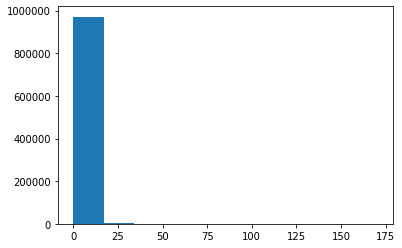

In [27]:
# histogram: univariate analysis
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['trip_distance'])  # skewed to the left
plt.show()

In [28]:
df[df['trip_distance'] > 100][["trip_distance", "total_amount"]] #boolean indexing

,trip_distance,total_amount
43605,119.34,423.32
275322,170.59,102.30
480046,103.91,90.00
501985,142.44,422.56
618718,126.98,90.00
791032,100.62,524.22
816982,100.37,485.30
859596,122.52,371.80
926258,133.75,663.32


In [29]:
(df['trip_distance'] == 0).mean()

0.011847814621487464

In [30]:
df[df['trip_distance'] == 0].shape[0] /df.shape[0] * 100

1.1847814621487465

In [31]:
high_cut = df['trip_distance'].quantile(0.95)
low_cut = df['trip_distance'].quantile(0.02)
print(high_cut, low_cut)

8.03 0.2


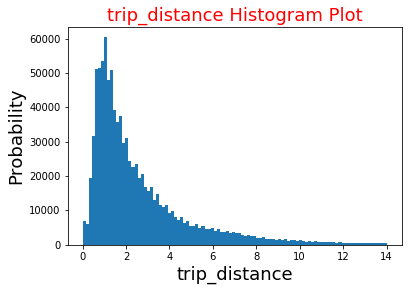

In [32]:
import matplotlib.pyplot as plt
col = "trip_distance"
maxcut = df[col].quantile(.99)
mincut = df[col].quantile(.01)
temp = df[(df[col] < maxcut) & (df[col] > mincut)][col]  #subsetting
plt.hist(temp, bins = 100)
plt.xlabel(col, fontsize =18)
plt.ylabel('Probability',fontsize =18)
plt.title(col + ' Histogram Plot',fontsize =18, color = "r")
plt.savefig("figs/" + col +".png",dpi=100) # univariate anaysis
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


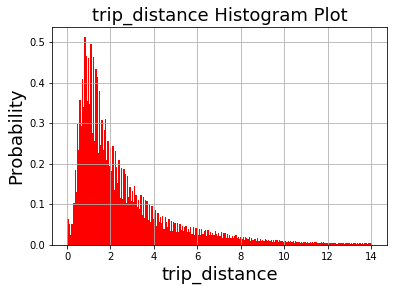

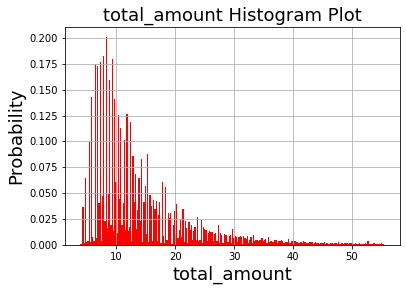

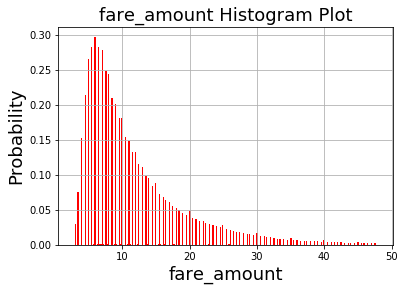

In [44]:
import matplotlib.pyplot as plt
continuous_cols = ['trip_distance', 'total_amount','fare_amount']
for col in continuous_cols:
    if col not in df.columns: continue
    maxcut = df[col].quantile(.99)   # cap and floor
    mincut = df[col].quantile(.01)
    temp = df[df[col] < maxcut][df[col] > mincut][col]
    plt.hist(temp, bins = 250, normed=1, facecolor='red')
    plt.xlabel(col, fontsize =18)
    plt.ylabel('Probability',fontsize =18)
    plt.title(col + ' Histogram Plot',fontsize =18)
    plt.grid(True)
    plt.savefig("figs/" + col +".png",dpi=100)
    plt.show()
    del temp

In [45]:
df.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,improvement_surcharge,total_amount,payment_type,trip_type,weekday,weekday2,trip_time_in_minutes
0,2017-06-01 00:33:45,2017-06-01 01:39:52,N,4,35,265,1,90.41,404.5,0.00,0.3,413.51,2,1.0,3,3,66.116667
1,2017-06-01 00:33:55,2017-06-01 23:36:23,N,1,263,75,1,0.38,4.0,1.59,0.3,6.89,1,1.0,3,3,1382.466667
2,2017-06-01 00:12:07,2017-06-01 00:12:07,N,1,255,43,1,9.49,31.0,8.08,0.3,40.38,1,1.0,3,3,0.000000


In [46]:
datetime_cols = [col for col in df.columns if "datetime" in col]
format_dt = "%Y-%m-%dT%H:%M:%S"
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format = format_dt)
df.dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
tip_amount                      float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                       float64
weekday                           int64
weekday2                          int64
trip_time_in_minutes            float64
dtype: object

In [47]:
# df['weekday'] = df['lpep_pickup_datetime'].weekday()

In [48]:
def get_weekday(x):
    return x.weekday()
df['weekday'] = df['lpep_pickup_datetime'].apply(get_weekday)  # elementwise operation
df['weekday2'] = df['lpep_pickup_datetime'].apply(lambda x: x.weekday())   # function used only once and very simple
df[['lpep_pickup_datetime', 'weekday','weekday2']].sample(10)

,lpep_pickup_datetime,weekday,weekday2
208471,2017-06-07 09:51:04,2,2
555084,2017-06-17 15:48:34,5,5
161691,2017-06-05 16:34:50,0,0
167294,2017-06-05 19:45:30,0,0
622566,2017-06-19 16:42:33,0,0
787936,2017-06-24 19:35:10,5,5
274319,2017-06-09 10:30:18,4,4
926831,2017-06-29 16:30:51,3,3
366769,2017-06-11 17:06:37,6,6
176155,2017-06-06 07:57:42,1,1


In [49]:
df['weekday'].value_counts()

4    179916
5    159519
3    157853
6    130317
2    119530
1    117798
0    111534
Name: weekday, dtype: int64

In [50]:
print(3 +  # line continuation
      5)

8


In [51]:
df['trip_time_in_minutes'] = (df['lpep_dropoff_datetime']- df['lpep_pickup_datetime']
                             ).\
                             apply(lambda x: x.total_seconds())/60 

In [52]:
df['speed'] = df['trip_distance'] / df['trip_time_in_minutes'] * 60
df[['speed','trip_distance','trip_time_in_minutes']].sample(10)

,speed,trip_distance,trip_time_in_minutes
930255,6.190476,0.65,6.300000
372523,11.152941,1.58,8.500000
256923,15.932773,3.16,11.900000
274918,11.070615,1.35,7.316667
532356,26.855474,5.11,11.416667
713714,10.152761,2.40,14.183333
698967,12.033149,1.21,6.033333
334343,0.000000,0.00,96.450000
150932,7.792683,1.42,10.933333
389918,28.965517,14.00,29.000000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


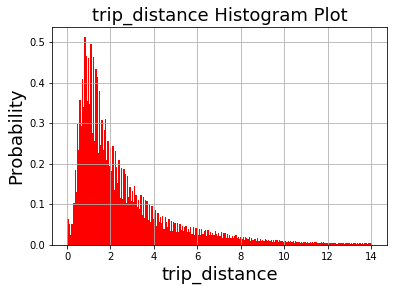

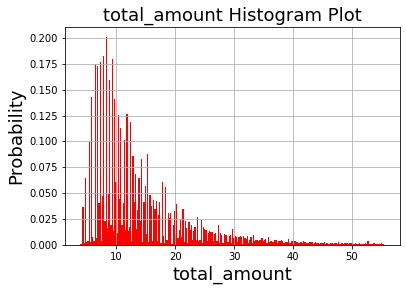

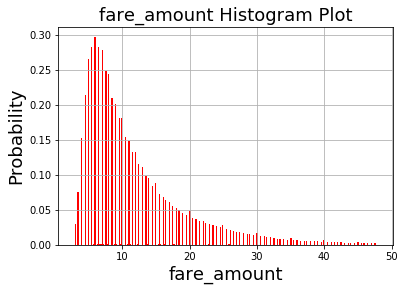

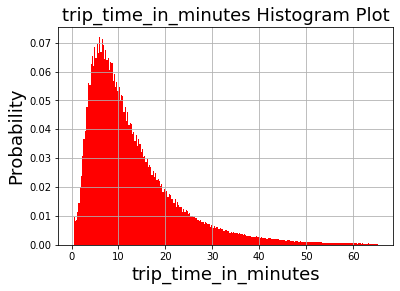

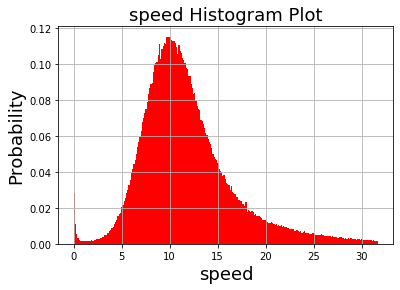

In [53]:
import matplotlib.pyplot as plt
continuous_cols = ['trip_distance', 'total_amount','fare_amount', 'trip_time_in_minutes','speed']
for col in continuous_cols:
    if col not in df.columns: continuec
    maxcut = df[col].quantile(.99)
    mincut = df[col].quantile(.01)
    temp = df[df[col] < maxcut][df[col] > mincut][col]
    plt.hist(temp, bins = 250, normed=1, facecolor='red')
    plt.xlabel(col, fontsize =18)
    plt.ylabel('Probability',fontsize =18)
    plt.title(col + ' Histogram Plot',fontsize =18)
    plt.grid(True)
    plt.savefig("figs/" + col +".png",dpi=100)
    plt.show()
    del temp

### Report mean and median trip distance grouped by hour of day.

Next we will create a new column hour based on pickup time. Then we can do some aggregation like mean and median distance by hour. 

In [54]:
df['hour'] = df['lpep_pickup_datetime'].apply(lambda x: x.hour)
df[['lpep_pickup_datetime','hour']].sample(10)

,lpep_pickup_datetime,hour
892926,2017-06-28 14:35:54,14
568222,2017-06-17 21:56:18,21
798100,2017-06-25 00:58:39,0
214546,2017-06-07 13:27:24,13
930256,2017-06-29 18:02:01,18
267751,2017-06-09 04:37:32,4
618196,2017-06-19 13:10:09,13
929360,2017-06-29 18:55:16,18
799731,2017-06-25 01:46:18,1
161809,2017-06-05 16:28:13,16


In [55]:
import numpy as np
distance_by_hour = df.groupby('hour')['trip_distance'].agg([np.mean, np.median])  # consistent conclusion
distance_by_hour

,mean,median
hour,,
0,2.912433,2.00
1,2.863342,1.97
2,2.994534,2.03
3,3.157933,2.17
4,3.514272,2.40
5,3.994923,2.74
6,3.813422,2.55
7,3.032450,1.95
8,2.736165,1.75


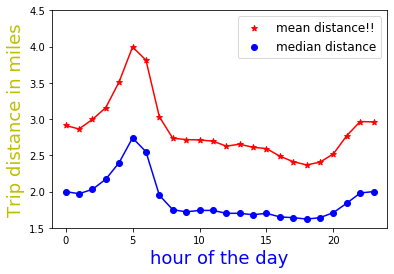

In [56]:
plt.scatter(range(24), distance_by_hour["mean"], c ='r',label = "mean distance!!", marker="*") #  Ctrl + / to comment/uncomment
plt.scatter(range(24), distance_by_hour['median'],c ='b',label = "median distance")
plt.plot(distance_by_hour['mean'],c ='r',label = "")  # line plot
plt.plot(distance_by_hour['median'],c ='b',label = "")
legend = plt.legend(loc='upper right', fontsize='large')
plt.axis([-1, 24, 1.5, 4.5])
plt.xlabel('hour of the day', fontsize = 18, color ="b")
plt.ylabel('Trip distance in miles', fontsize = 18, color = "y")
plt.savefig("figs/by_hour_distance.png", dpi = 100)
plt.show()

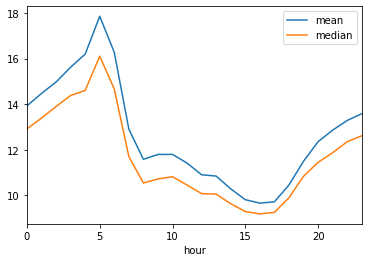

In [57]:
speed_by_hour = df[df['speed'] < 100].groupby('hour')['speed'].agg([np.mean, np.median])  # consistent conclusion
speed_by_hour.plot()

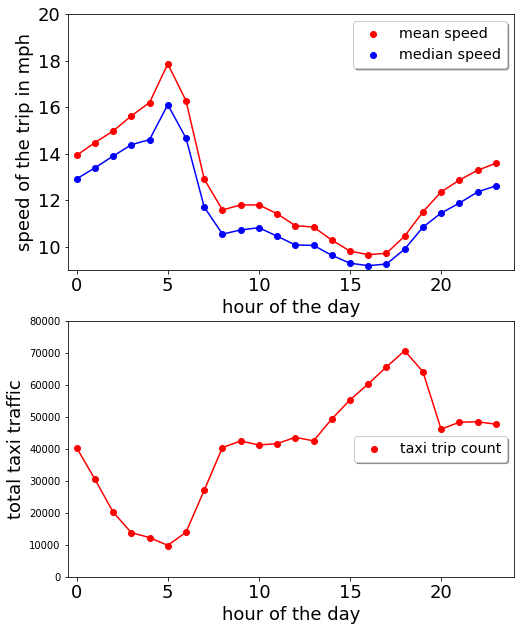

In [58]:
df2 = df[df['speed'] < 100]
plt.figure(figsize=(8,16))
ax1 = plt.subplot(311)
plt.scatter(range(24), speed_by_hour["mean"], c ='r',label = "mean speed")
plt.scatter(range(24), speed_by_hour['median'],c ='b',label = "median speed")
plt.plot(range(24), speed_by_hour['mean'],c ='r',label = "")
plt.plot(range(24), speed_by_hour['median'],c ='b',label = "")
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.axis([-0.5, 24, 9, 20])

plt.ylabel('speed of the trip in mph',fontsize=18)
plt.setp(ax1.get_xticklabels(),fontsize=18)
plt.setp(ax1.get_yticklabels(),fontsize=18)
plt.xlabel('hour of the day',fontsize=18)
ax2 = plt.subplot(312, sharex=ax1)
plt.scatter(range(24), df2.groupby('hour')['speed'].count(), c ='r',label = "taxi trip count")
legend = plt.legend(loc='right', shadow=True, fontsize='x-large')
plt.plot(range(24), df.groupby('hour')['speed'].count(), c ='r')
plt.axis([-0.5, 24, 0, 80000])
plt.setp(ax2.get_xticklabels(),fontsize=18)
plt.setp(ax2.get_yticklabels(),fontsize=10)
plt.xlabel('hour of the day',fontsize=18)
plt.ylabel('total taxi traffic',fontsize=18)
plt.savefig("figs/by_hour.png", dpi =100)
plt.show()

## Analyze LGA and JFK traffic by terminals

In [59]:
%time
import pandas as pd
year, month = 2015, 9
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv" % (year,month)
raw_data = pd.read_csv(url)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [60]:
df = raw_data.copy()

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [62]:
datetime_cols = df.columns[1:3]
format_dt = "%Y-%m-%dT%H:%M:%S"
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format = format_dt)
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                       float64
dtype: object

LGA airport green taxi traffic:
Terminal A :   Picking up 15  times  Dropping off 612  times
Dropoff mean fare is:  26.38  dollars. The dropoff mean distance is:  6.02  miles
Pickup mean fare is:  20.84  dollars. The pickup mean distance is:  4.88  miles

Terminal B :   Picking up 146  times  Dropping off 11428  times
Dropoff mean fare is:  25.56  dollars. The dropoff mean distance is:  6.08  miles
Pickup mean fare is:  33.70  dollars. The pickup mean distance is:  4.09  miles

Terminal C :   Picking up 106  times  Dropping off 5496  times
Dropoff mean fare is:  28.46  dollars. The dropoff mean distance is:  6.83  miles
Pickup mean fare is:  30.75  dollars. The pickup mean distance is:  4.66  miles

Terminal D :   Picking up 52  times  Dropping off 3197  times
Dropoff mean fare is:  28.13  dollars. The dropoff mean distance is:  6.74  miles
Pickup mean fare is:  32.37  dollars. The pickup mean distance is:  2.78  miles

LGA taxi traffic average distance is:  6.35  miles
LGA taxi traffi

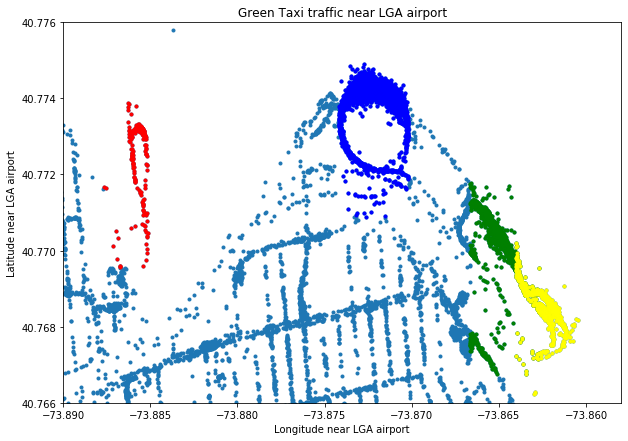

In [63]:
LGA_taxi = pd.DataFrame()
terminals = ["A", "B", "C", "D"]
colors = ["red",'blue','green','yellow']
LGA = [[40.772562, -73.885640], [40.773893, -73.872204],[40.769722, -73.864659],[40.768702, -73.862036]]  #LGA terminal coordinates
plt.figure(figsize=(10,7))
plt.scatter(df['Dropoff_longitude'], df['Dropoff_latitude'],marker = '.')
print( "LGA airport green taxi traffic:")
for i in range(len(LGA)):
    temp1 = df[(abs(df["Pickup_latitude"] - LGA[i][0]) < 0.003) & (abs(df["Pickup_longitude"] - LGA[i][1]) < 0.002)]
    temp2 = df[(abs(df["Dropoff_latitude"] - LGA[i][0]) < 0.003) & (abs(df["Dropoff_longitude"] - LGA[i][1]) < 0.002)]
    LGA_taxi = LGA_taxi.append(temp1)
    LGA_taxi = LGA_taxi.append(temp2)
    plt.scatter(temp2['Dropoff_longitude'], temp2['Dropoff_latitude'], color =colors[i],marker =".")
    print ("Terminal", terminals[i], ":   Picking up", temp1.shape[0], " times"," Dropping off", temp2.shape[0], " times" )
    print ("Dropoff mean fare is: ", "{0:.2f}".format(np.mean(temp2['Total_amount'])), " dollars. The dropoff mean distance is: ",\
          "{0:.2f}".format(np.mean(temp2['Trip_distance'])), " miles")
    print ("Pickup mean fare is: ", "{0:.2f}".format(np.mean(temp1['Total_amount'])), " dollars. The pickup mean distance is: ",\
          "{0:.2f}".format(np.mean(temp1['Trip_distance'])), " miles")
    print ()

LGA_count = LGA_taxi.shape[0]
LGA_avg_distance = np.mean(LGA_taxi['Trip_distance'])
LGA_avg_fare = np.mean(LGA_taxi['Total_amount'])

print ("LGA taxi traffic average distance is: ","{0:.2f}".format(LGA_avg_distance), " miles")
print ("LGA taxi traffic average fare is: ", "{0:.2f}".format(LGA_avg_fare), " dollars")
plt.xlim(-73.890, -73.858)
plt.ylim(40.766, 40.776)
plt.xlabel('Longitude near LGA airport')
plt.ylabel('Latitude near LGA airport')
plt.title("Green Taxi traffic near LGA airport")
plt.savefig("figs/LGA.png", dpi = 100)

In [64]:
JFK = [40.646, -73.784]  #JFK terminal coordinates
Pickup_at_JFK = df[(abs(df["Pickup_latitude"] - JFK[0]) < 0.008) & (abs(df["Pickup_longitude"] - JFK[1]) < 0.01)]
Dropoff_at_JFK = df[(abs(df["Dropoff_latitude"] - JFK[0]) < 0.008) & (abs(df["Dropoff_longitude"] - JFK[1]) < 0.01)]
JFK_taxi = Pickup_at_JFK.append(Dropoff_at_JFK)
JFK_count = JFK_taxi.shape[0]
JFK_avg_distance = np.mean(JFK_taxi['Trip_distance'])
JFK_avg_fare = np.mean(JFK_taxi['Total_amount'])
print ("JFK total taxi traffic is: ", JFK_count, " times in September 2015")
print( "JFK taxi traffic average distance is: ","{0:.2f}".format(JFK_avg_distance), " miles")
print( "JFK taxi traffic average fare is: ", "{0:.2f}".format(JFK_avg_fare), " dollars")

JFK total taxi traffic is:  13110  times in September 2015
JFK taxi traffic average distance is:  13.59  miles
JFK taxi traffic average fare is:  48.65  dollars


In [65]:
NYC_count = df.shape[0]
NYC_avg_distance = np.mean(df['Trip_distance'])
NYC_avg_fare = np.mean(df['Total_amount'])

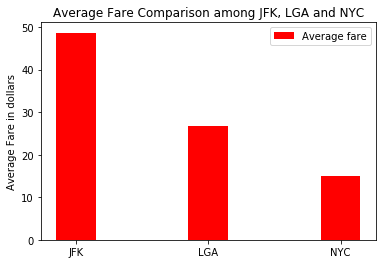

In [66]:
index = np.arange(3)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(range(3), (JFK_avg_fare,LGA_avg_fare,NYC_avg_fare), bar_width, alpha=opacity, color='r', label='Average fare')
plt.ylabel('Average Fare in dollars')
plt.title('Average Fare Comparison among JFK, LGA and NYC')
plt.xticks(index , ('JFK', 'LGA', 'NYC'))
plt.legend()
#plt.tight_layout()
plt.savefig("figs/average_fare.png")
plt.show()

In [67]:
print ("JFK total taxi traffic is: ", JFK_count, "average fare is: ", \
      "{0:.2f}".format(JFK_avg_fare), "dollars,", "the average distance is:", "{0:.2f}".format(JFK_avg_distance), "miles"
)
print ("LGA total taxi traffic is: ", LGA_count, "average fare is: ", \
      "{0:.2f}".format(LGA_avg_fare), "dollars,", "the average distance is:", "{0:.2f}".format(LGA_avg_distance), " miles")
print ("The total NYC traffic is:", NYC_count, "average fare is: ", \
      "{0:.2f}".format(NYC_avg_fare), "dollars,", "the average distance is:", "{0:.2f}".format(NYC_avg_distance), " miles")

JFK total taxi traffic is:  13110 average fare is:  48.65 dollars, the average distance is: 13.59 miles
LGA total taxi traffic is:  21052 average fare is:  26.83 dollars, the average distance is: 6.35  miles
The total NYC traffic is: 1494926 average fare is:  15.03 dollars, the average distance is: 2.97  miles


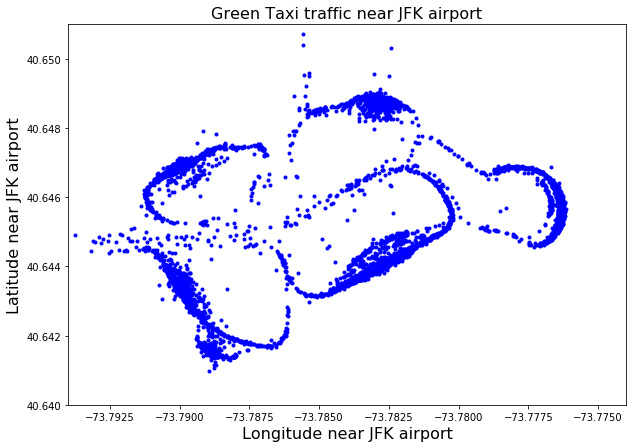

In [68]:
plt.figure(figsize=(10,7))
plt.scatter(df['Dropoff_longitude'], df['Dropoff_latitude'], color = 'blue',marker='.')
plt.xlim(-73.794,-73.774)
plt.ylim(40.64,40.651)
plt.xlabel('Longitude near JFK airport', fontsize =16)
plt.ylabel('Latitude near JFK airport', fontsize =16)
plt.title("Green Taxi traffic near JFK airport", fontsize =16)
plt.savefig("figs/JFK.png",dpi = 100)
# several terminals are clearly to be seen from this plot.